#**Wine Quality Prediction**

**Problem Statement : The main focus of this project is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture.**

In [1]:
#Importing the libraries
#Importing Pandas library for data manipulation
import pandas as pd

#Importing Numpy for numerical analysis
import numpy as np

#Importing Matplotlib and Seaborn libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#For disabling the warnings, importing Filterwarnings
from warnings import filterwarnings
filterwarnings('ignore')

#Importing OS
import os

In [2]:
data = pd.read_csv('/content/Wine quality.csv')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
data.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [ ]:
data.shape

(1143, 13)

**In this dataset, there are 1143 Rows and 13 Columns.**

In [ ]:
#Check the variable types
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#Check duplicates values
data.duplicated().sum()

0

In [ ]:
#Check null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

#Random Forest

7.9 is the medianvalue for--fixed acidity


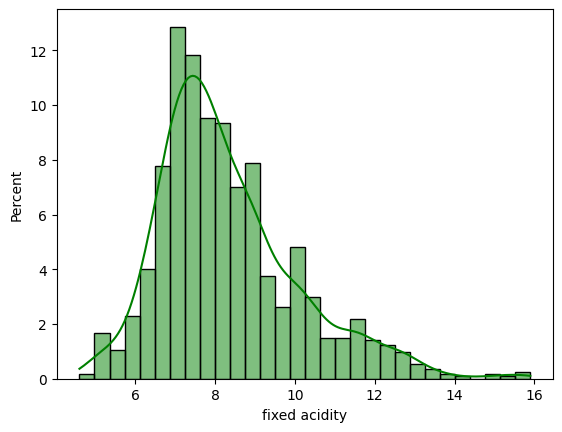

0.52 is the medianvalue for--volatile acidity


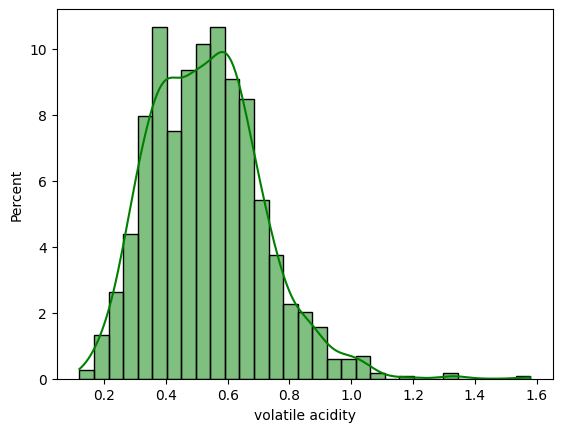

0.25 is the medianvalue for--citric acid


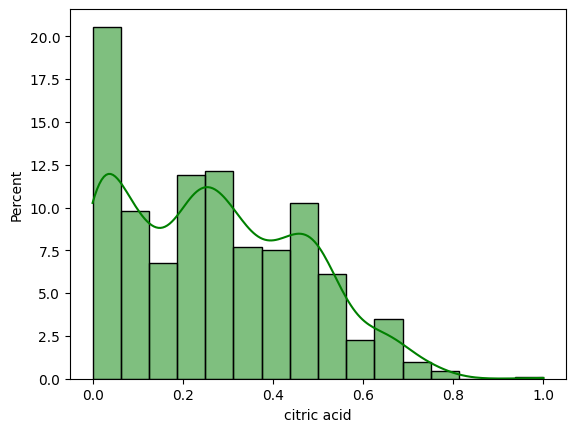

2.2 is the medianvalue for--residual sugar


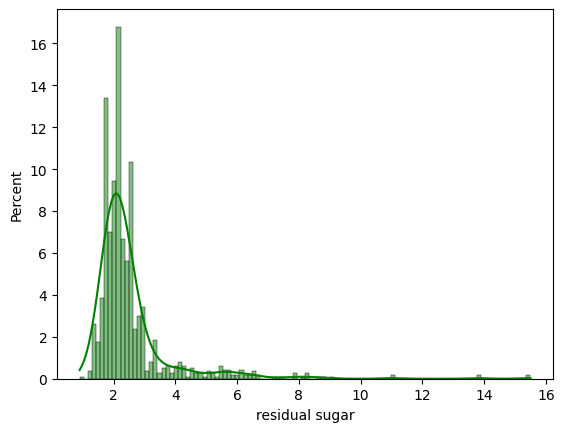

0.079 is the medianvalue for--chlorides


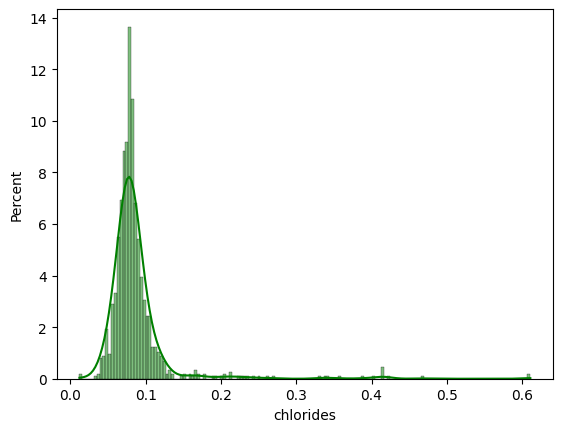

13.0 is the medianvalue for--free sulfur dioxide


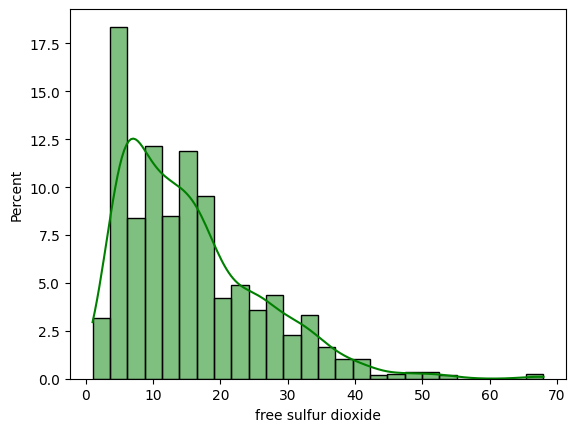

37.0 is the medianvalue for--total sulfur dioxide


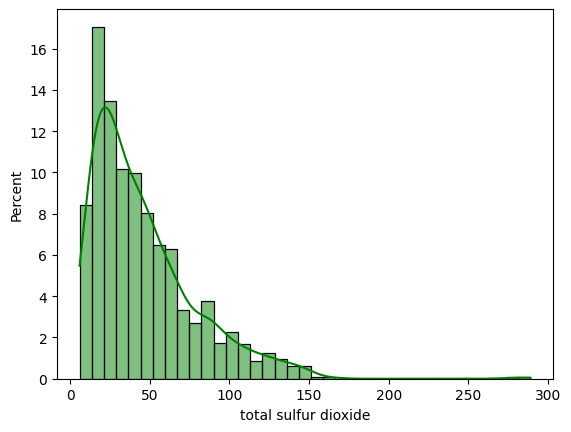

0.99668 is the medianvalue for--density


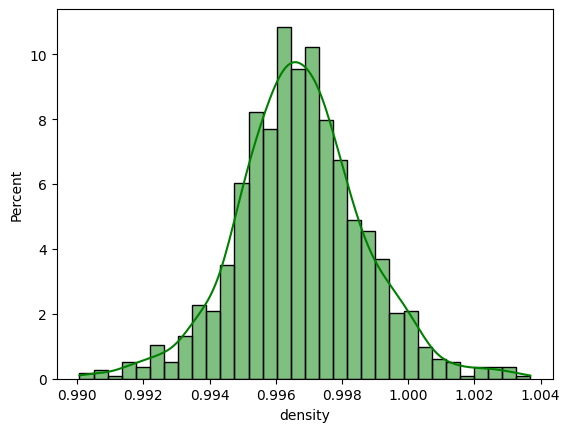

3.31 is the medianvalue for--pH


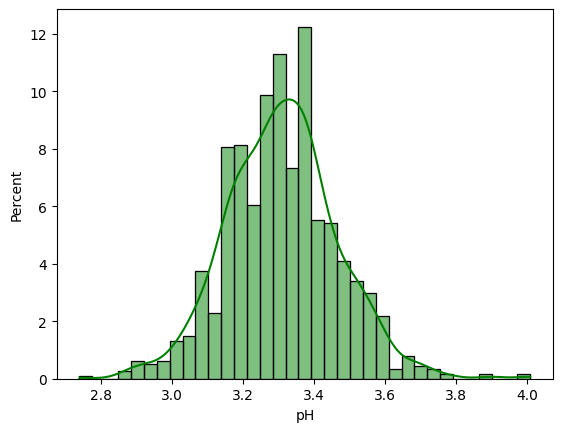

0.62 is the medianvalue for--sulphates


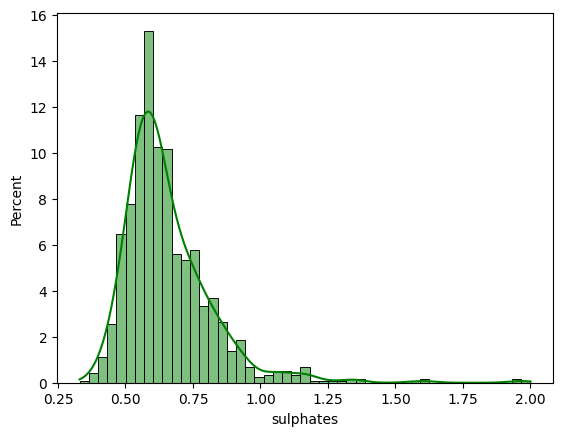

10.2 is the medianvalue for--alcohol


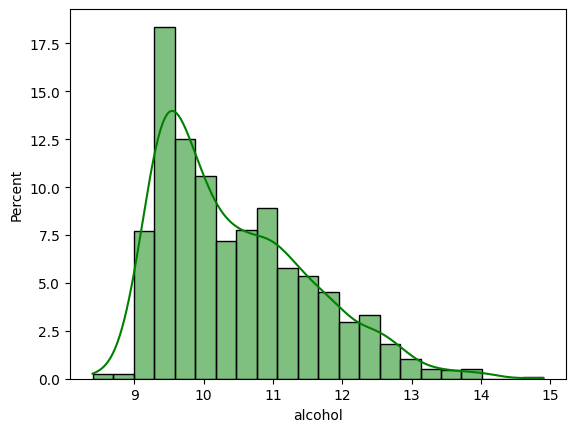

6.0 is the medianvalue for--quality


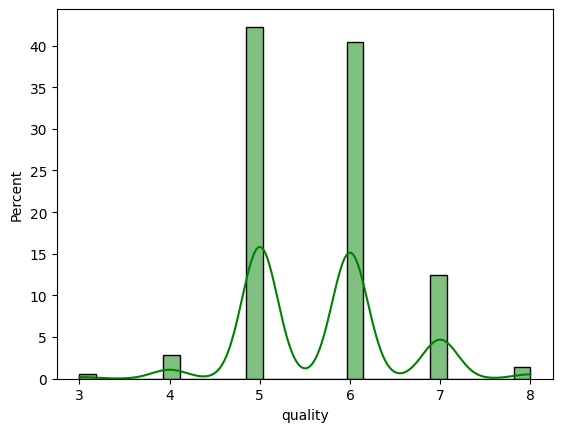

794.0 is the medianvalue for--Id


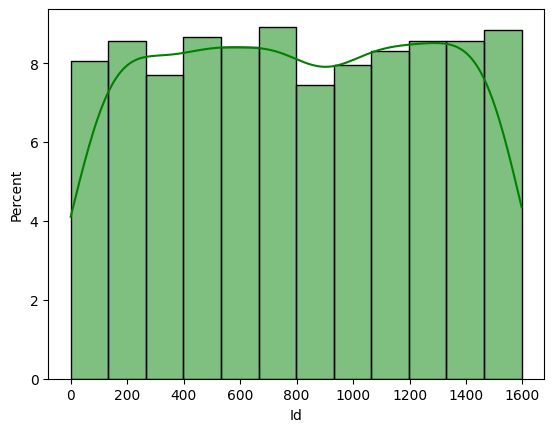

In [ ]:
#histograms
for column in data.columns:
  print(f"{np.median(data[column])} is the medianvalue for--{column}")
  sns.histplot(data=data, x=column, stat='percent',kde=True,color='g')
  plt.show()

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
columns=['volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']

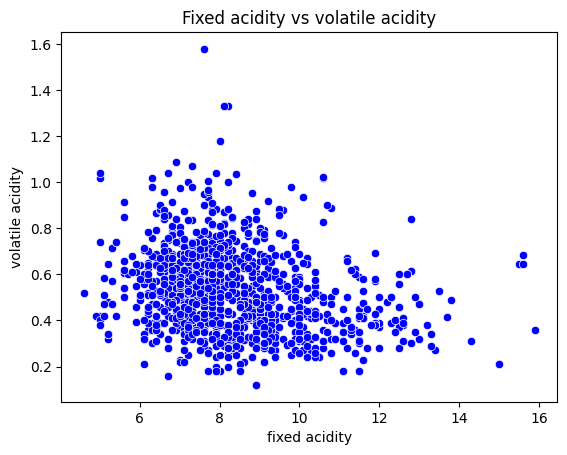

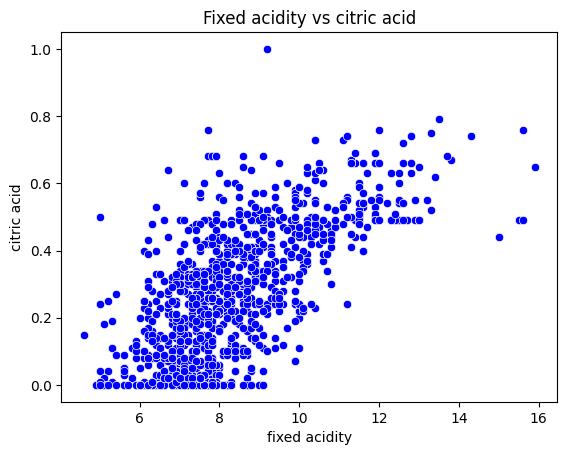

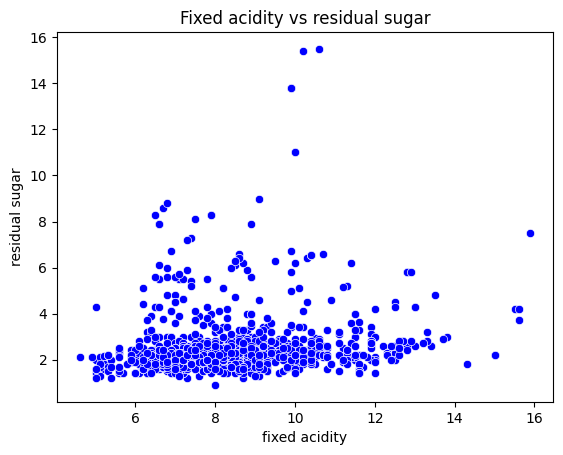

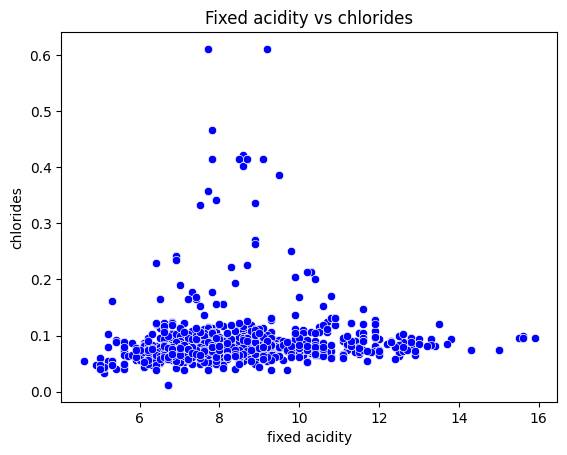

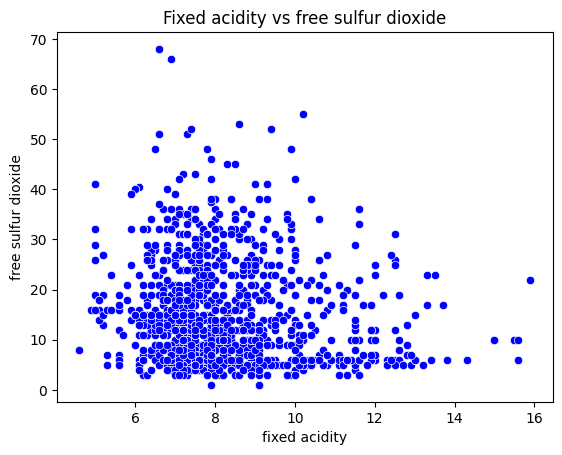

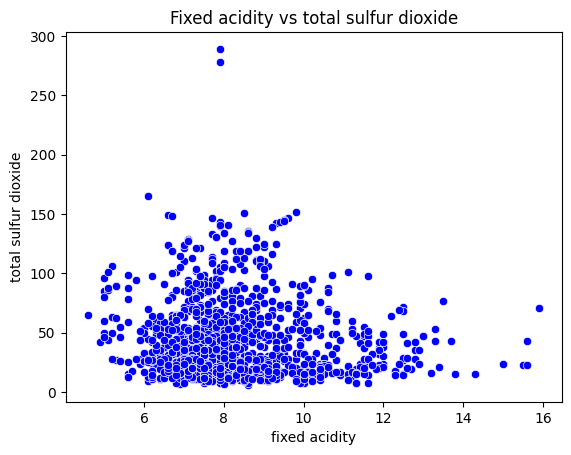

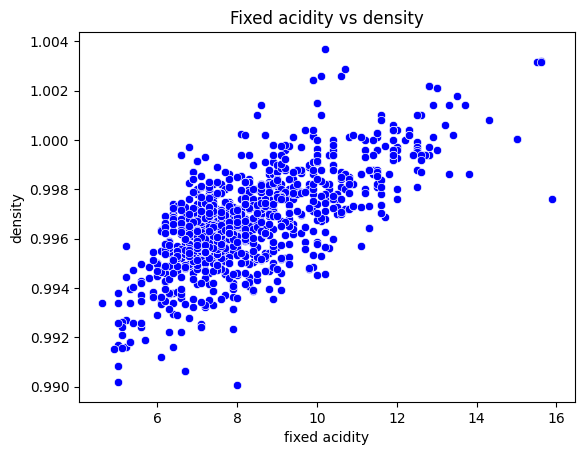

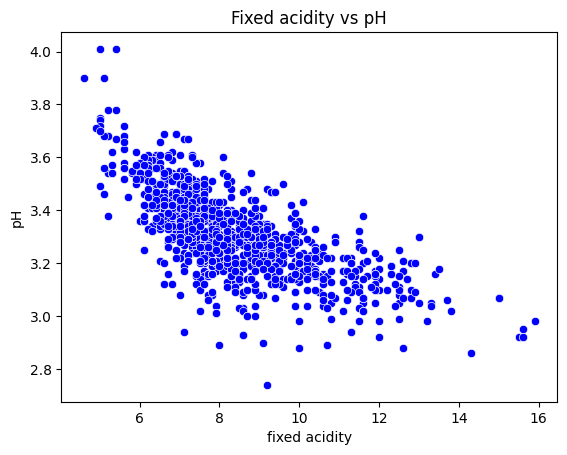

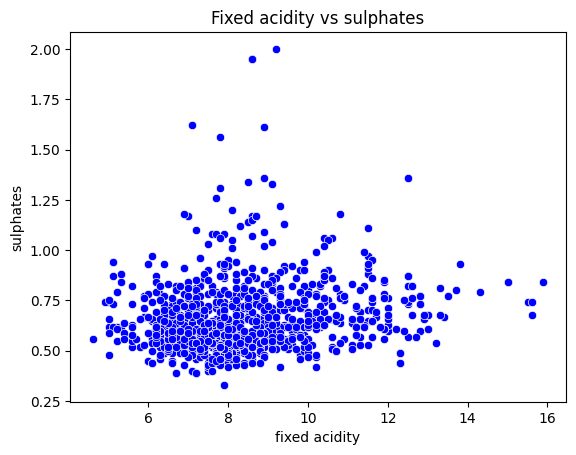

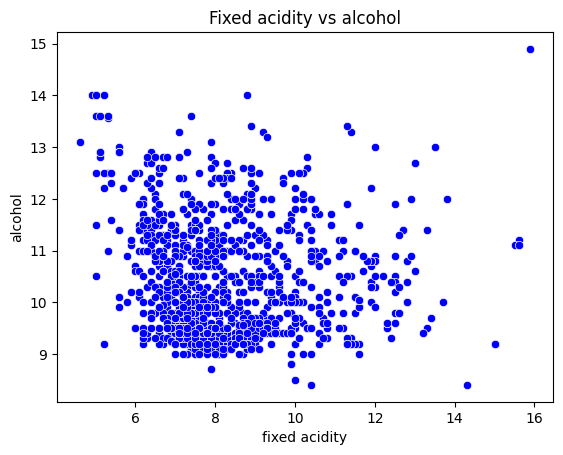

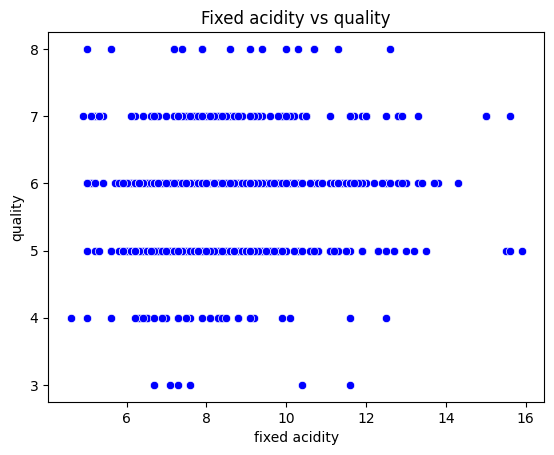

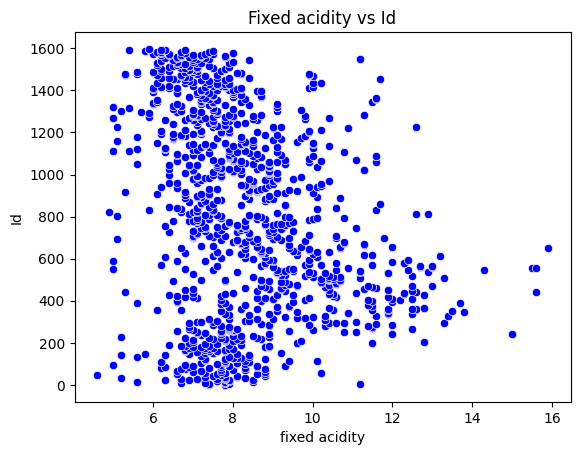

In [ ]:
#Scatter plot for fixed acidity
for column in columns:
  plt.title(f"Fixed acidity vs {column}")
  sns.scatterplot(data=data, x='fixed acidity',y=column, color='b')
  plt.show()

In [ ]:
#Scatter plot for volatile acidity
coluumns = ['citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

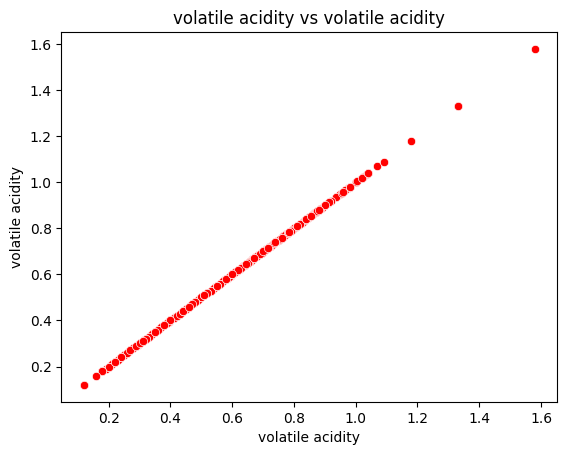

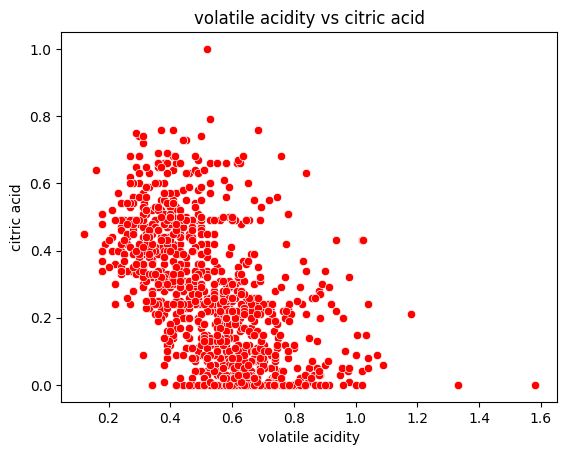

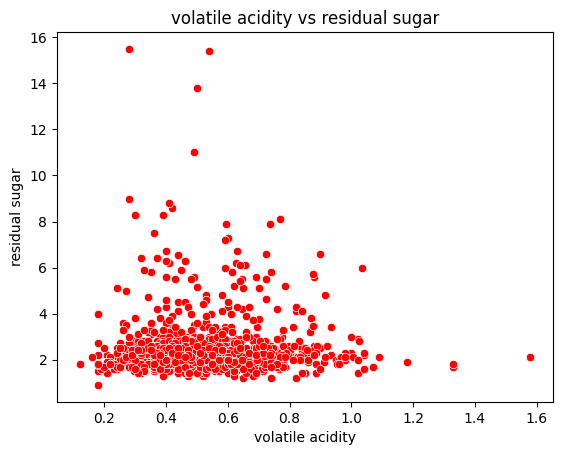

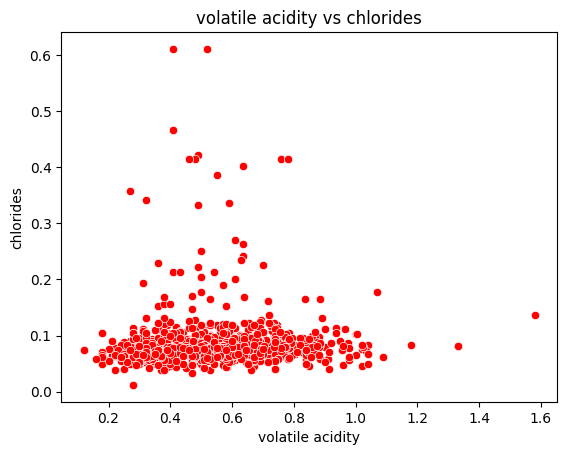

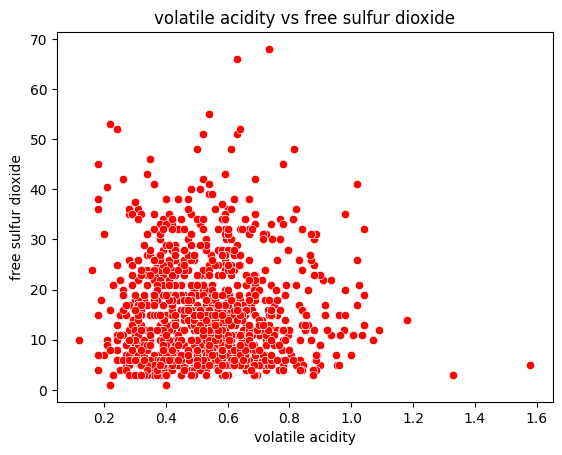

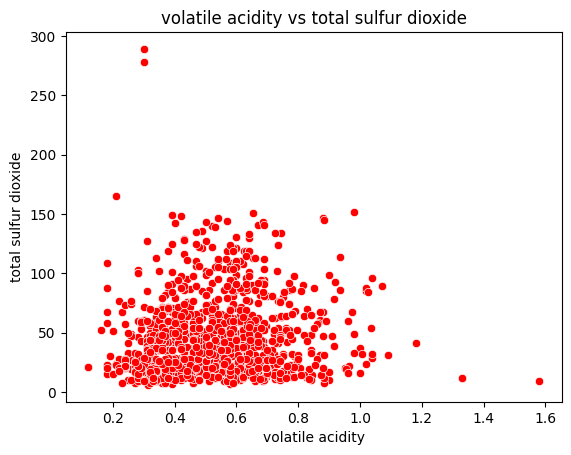

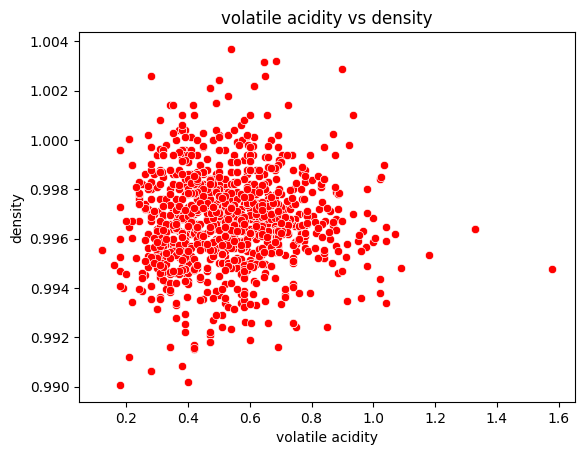

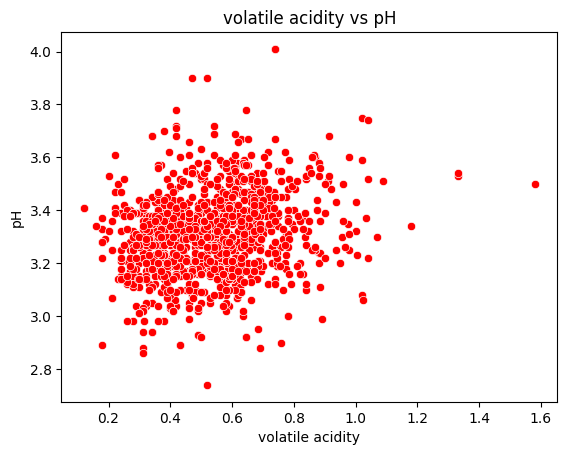

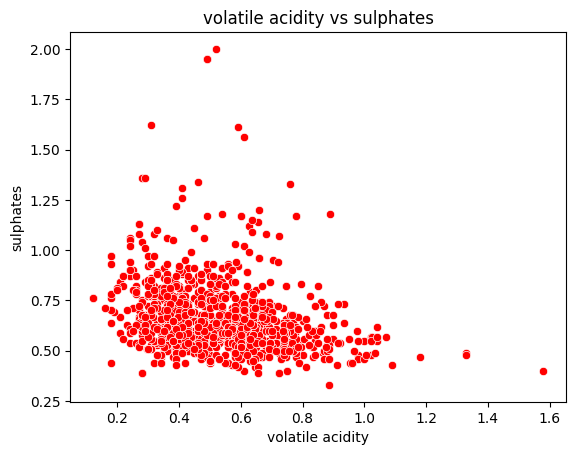

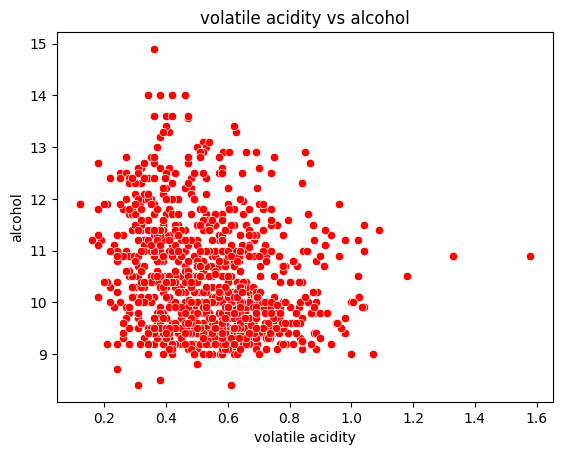

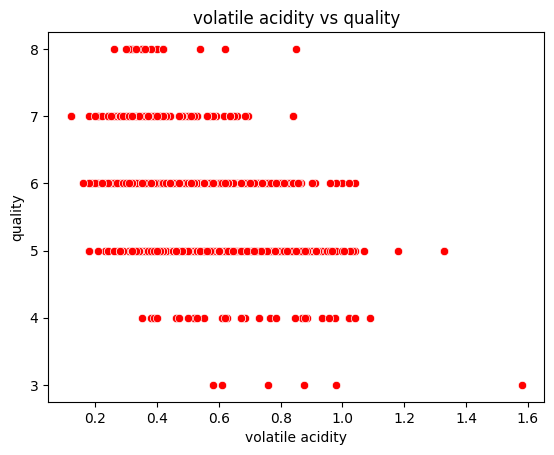

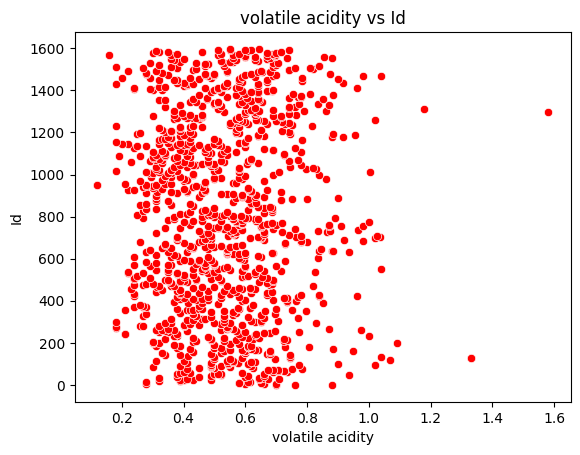

In [ ]:
for column in columns:
  plt.title(f"volatile acidity vs {column}")
  sns.scatterplot(data = data, x='volatile acidity',y=column,
                  color='red')
  plt.show()

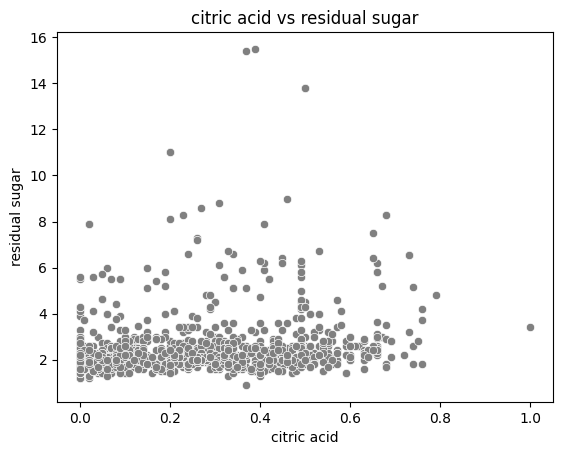

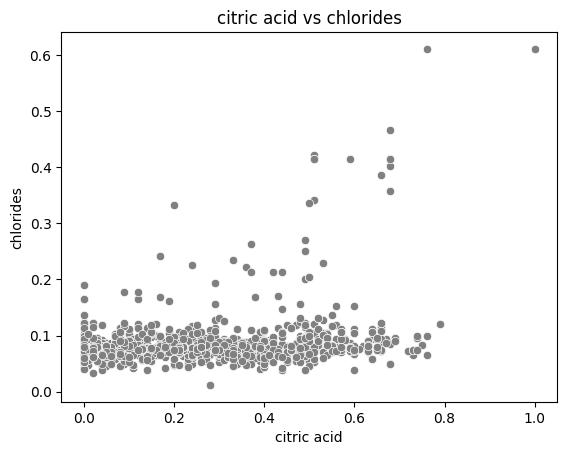

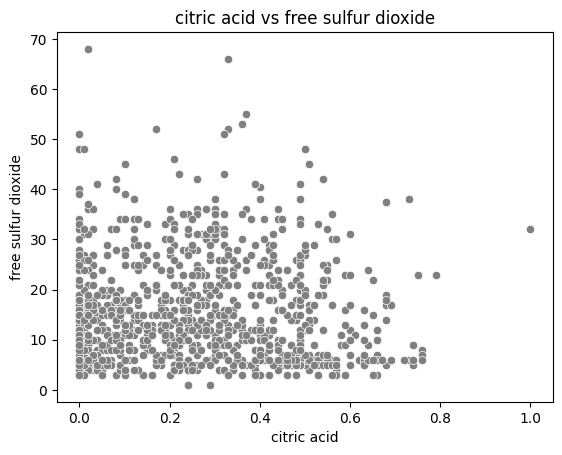

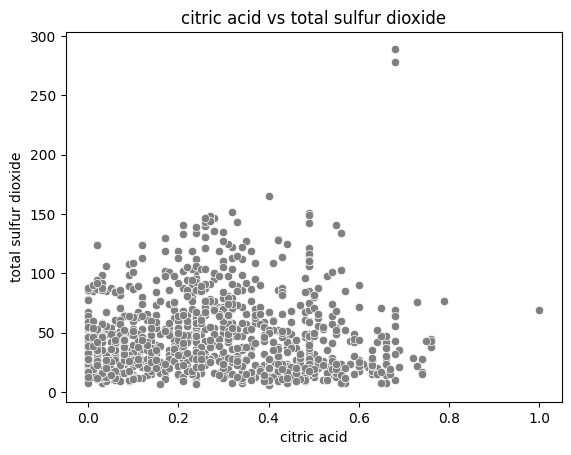

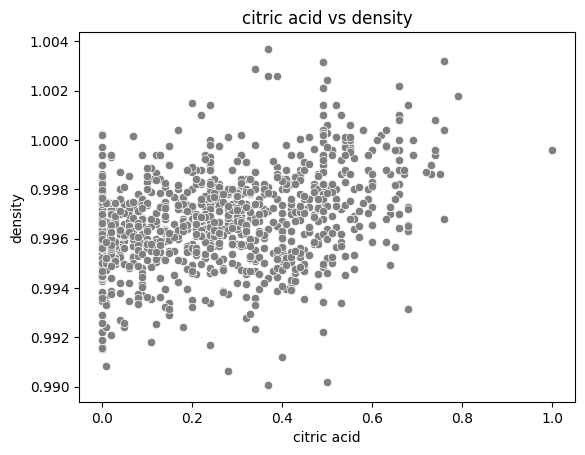

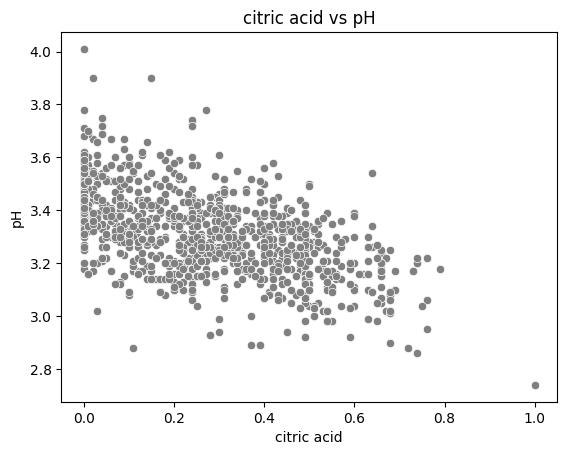

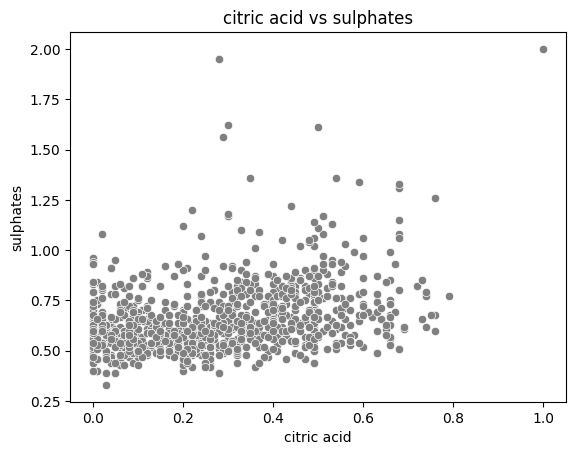

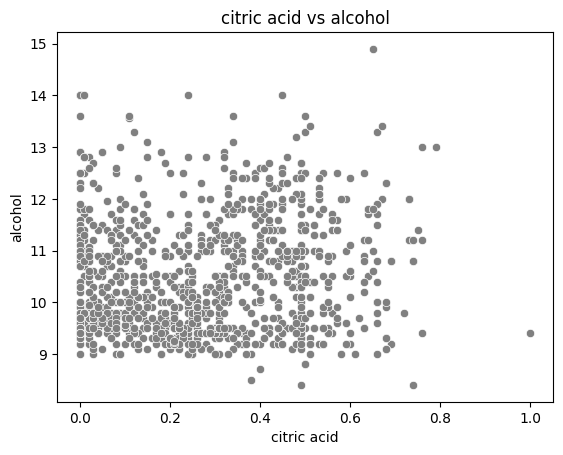

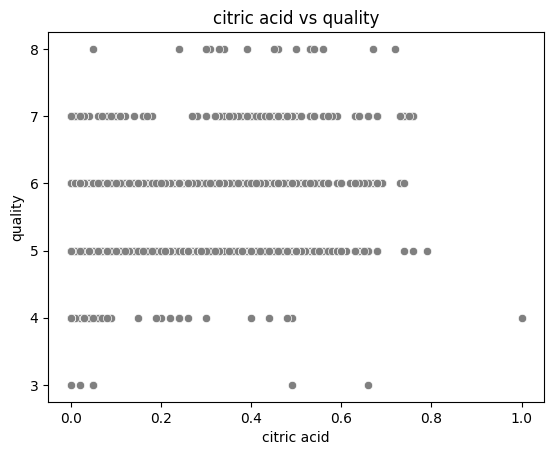

In [ ]:
#Scatterplot for citric acid
columns=['residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
  plt.title(f"citric acid vs {column}")
  sns.scatterplot(data=data, x='citric acid',y=column,
                  color='grey')
  plt.show()

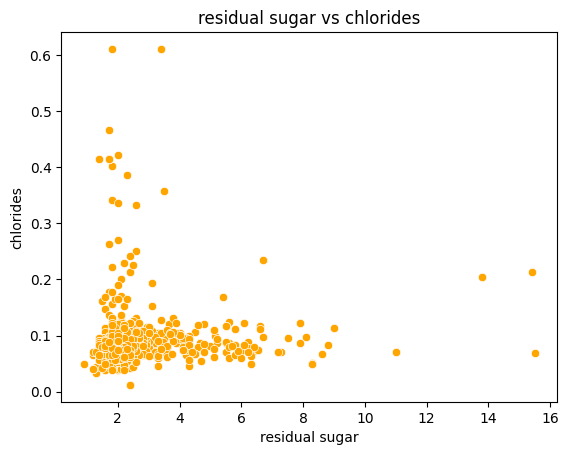

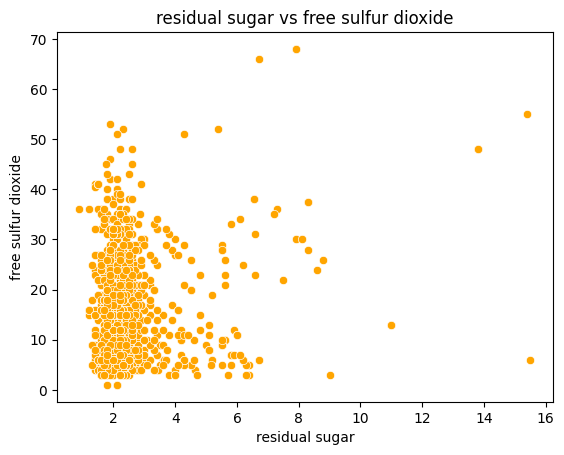

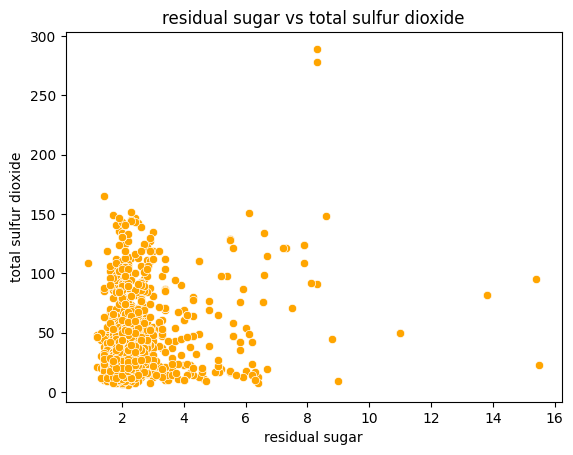

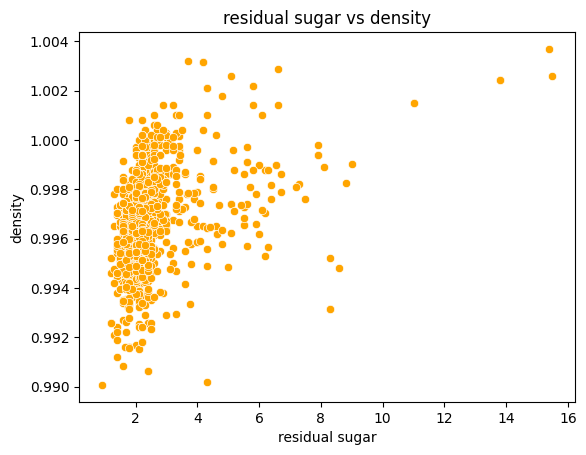

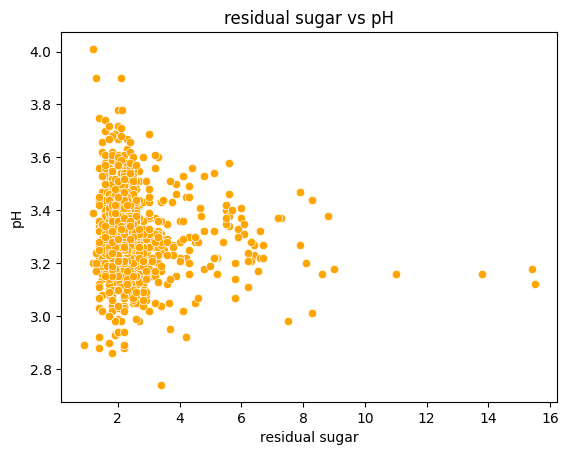

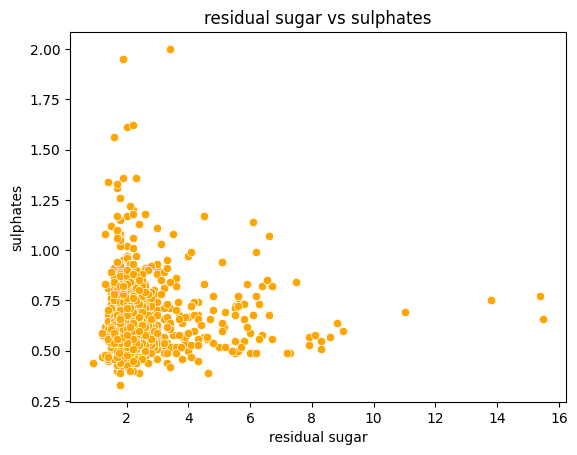

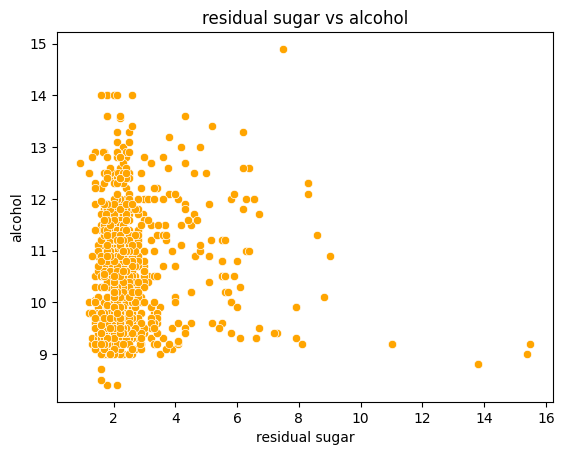

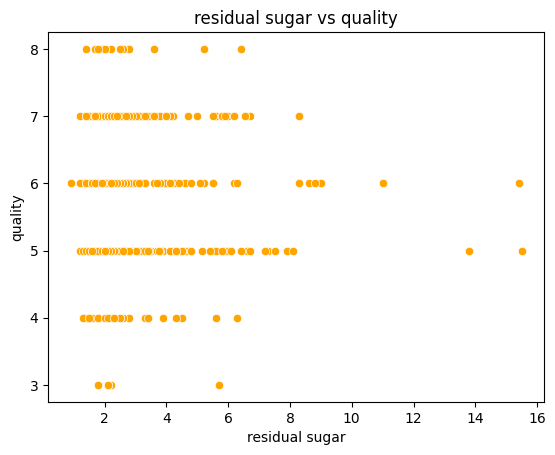

In [ ]:
#Scatterplot for residual sugar
columns=['chlorides','free sulfur dioxide', 'total sulfur dioxide',
         'density','pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
  plt.title(f"residual sugar vs {column}")
  sns.scatterplot(data=data, x='residual sugar',y=column,
                color='orange')
  plt.show()

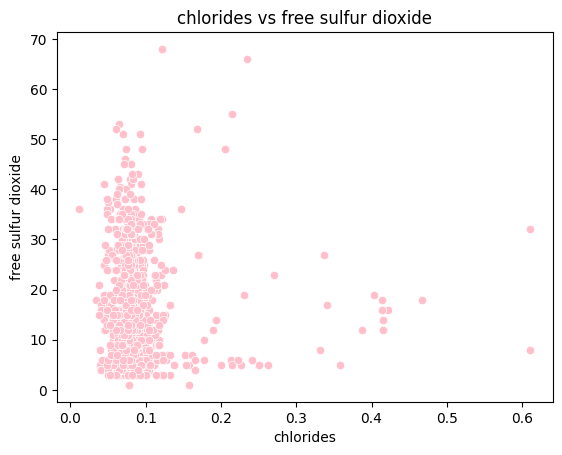

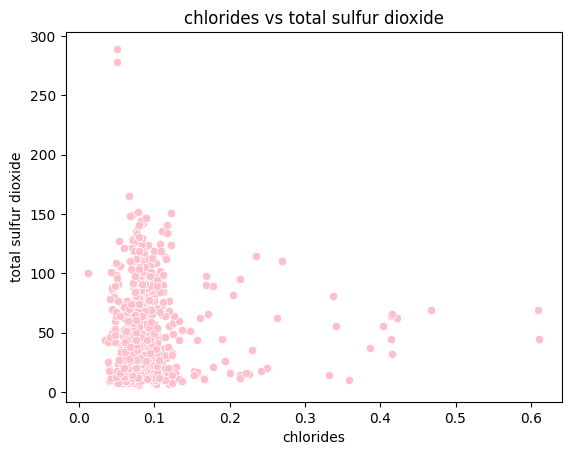

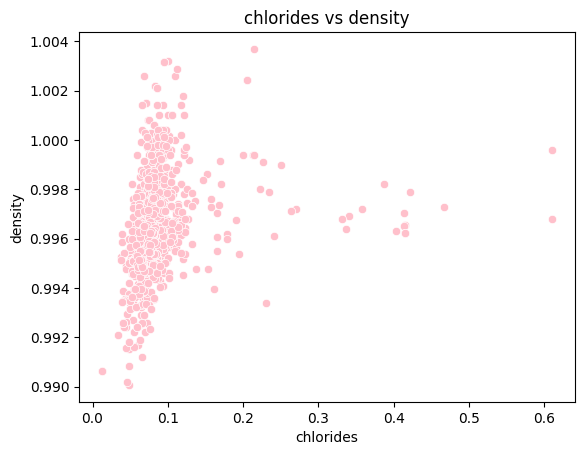

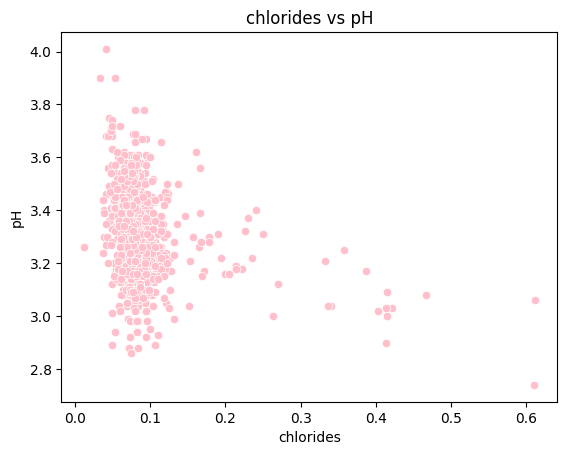

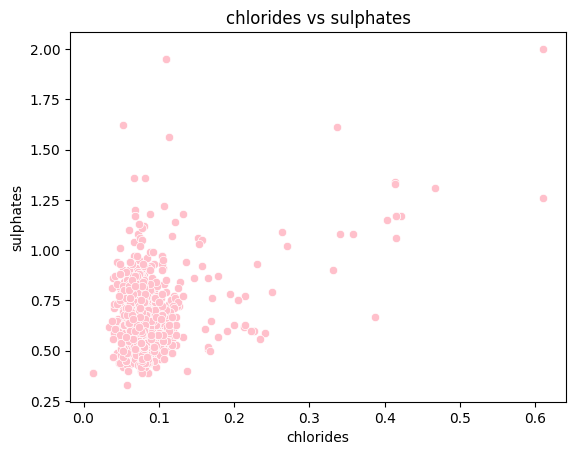

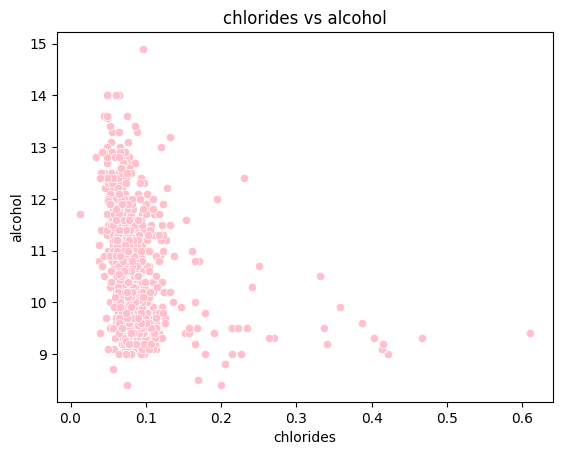

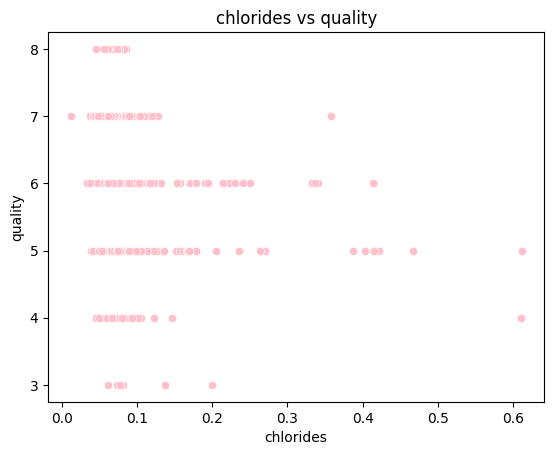

In [ ]:
#Scatterplot for chlorides
columns=['free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
  plt.title(f"chlorides vs {column}")
  sns.scatterplot(data=data, x='chlorides',y=column,
                  color='pink')
  plt.show()

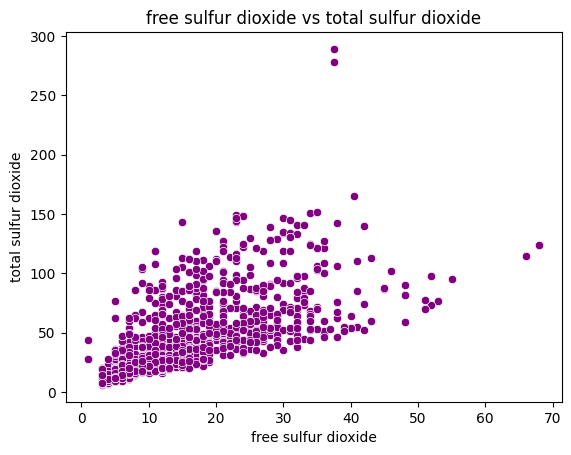

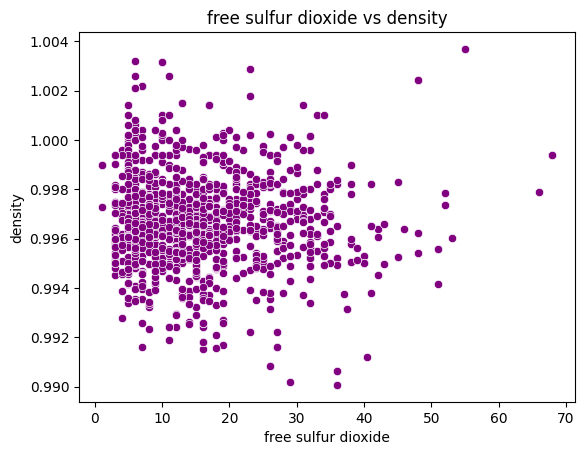

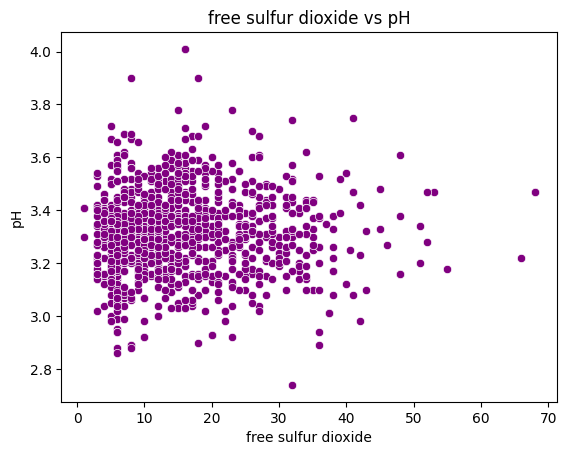

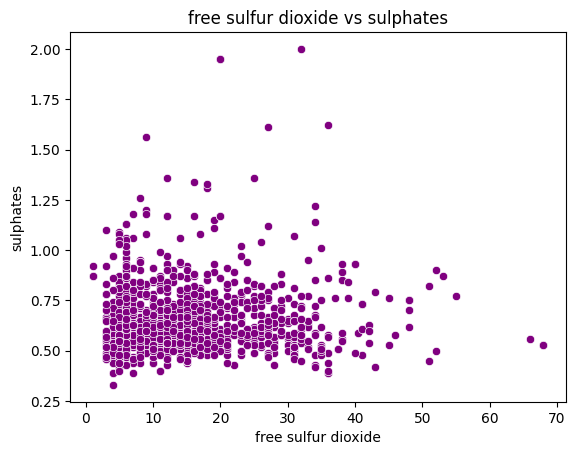

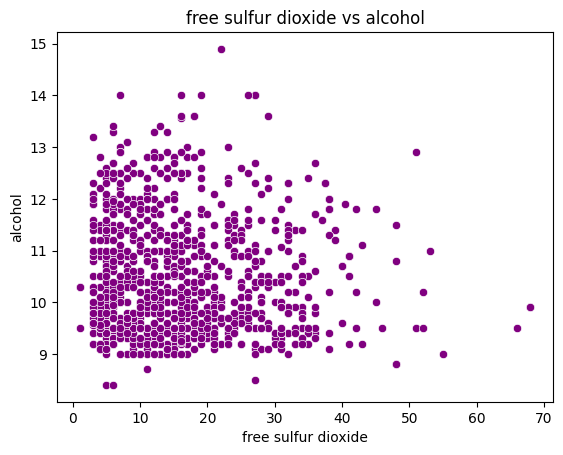

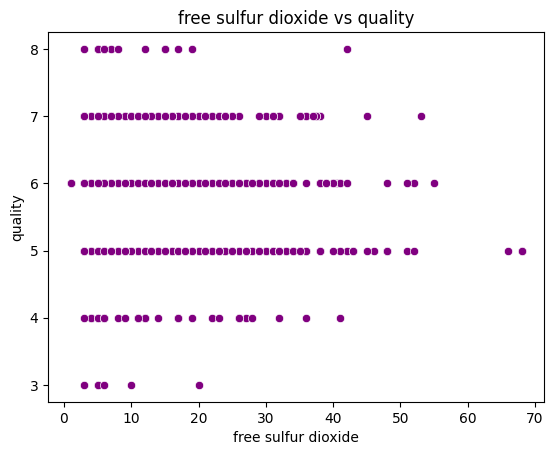

In [ ]:
#Scatterplot for free sulfur dioxide
columns=[ 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
  plt.title(f"free sulfur dioxide vs {column}")
  sns.scatterplot(data=data, x='free sulfur dioxide', y=column,
                   color='purple')
  plt.show()

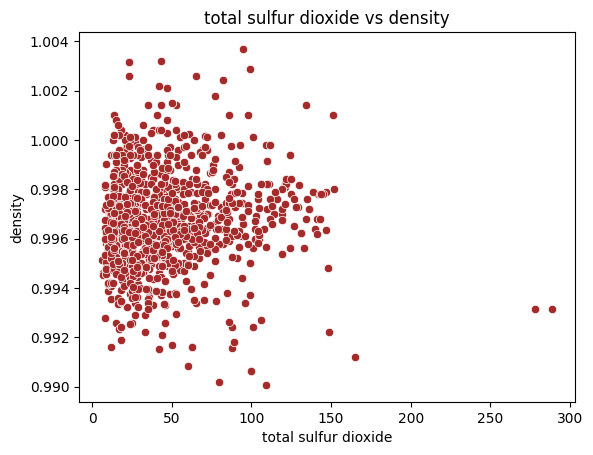

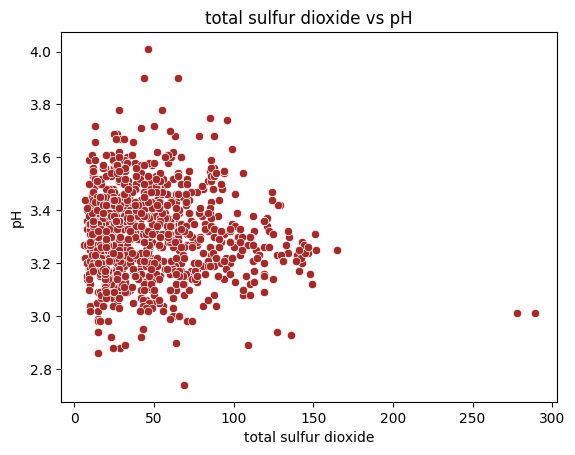

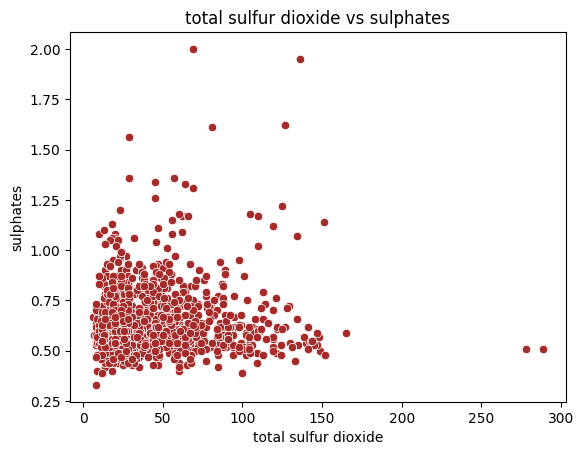

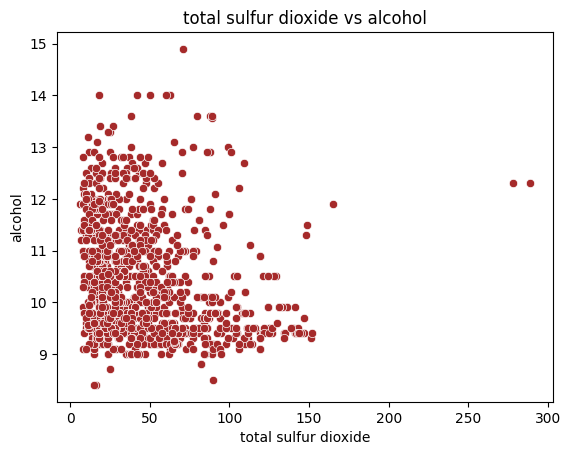

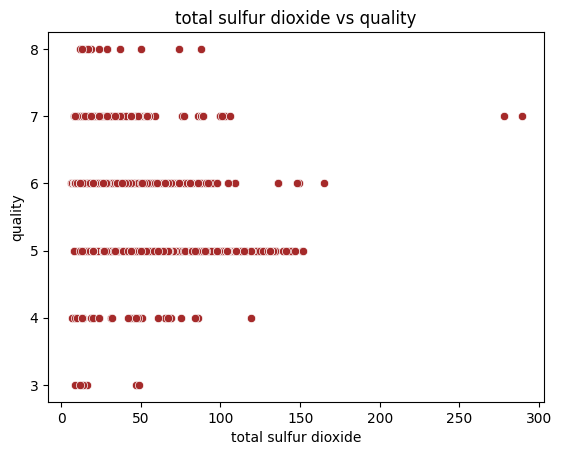

In [ ]:
#Scatterplot for total sulfur dioxide
columns = ['density','pH', 'sulphates', 'alcohol', 'quality']
for column in columns:
  plt.title(f"total sulfur dioxide vs {column}")
  sns.scatterplot(data=data, x='total sulfur dioxide',
                  y=column, color='brown')
  plt.show()

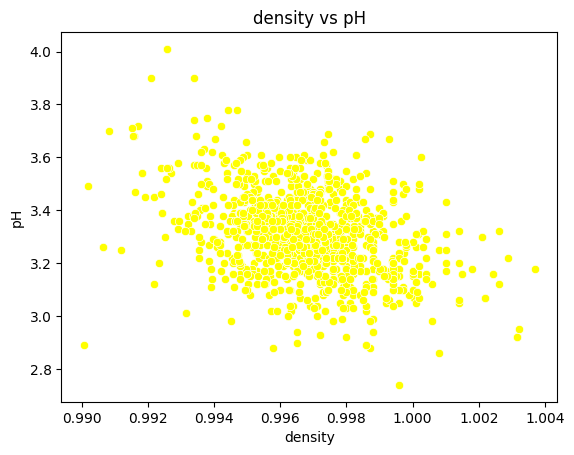

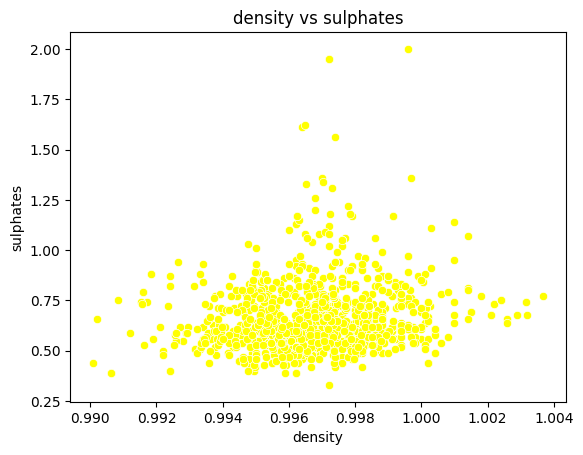

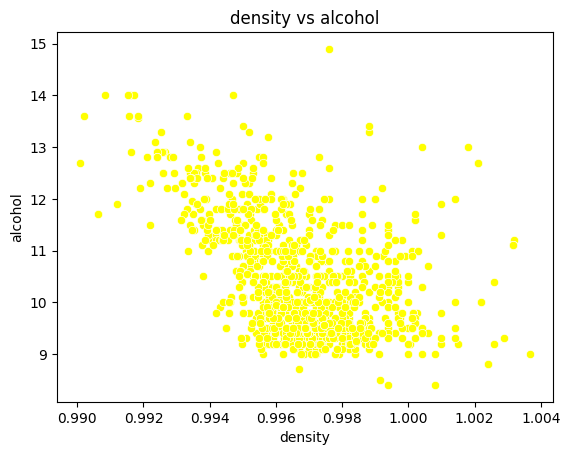

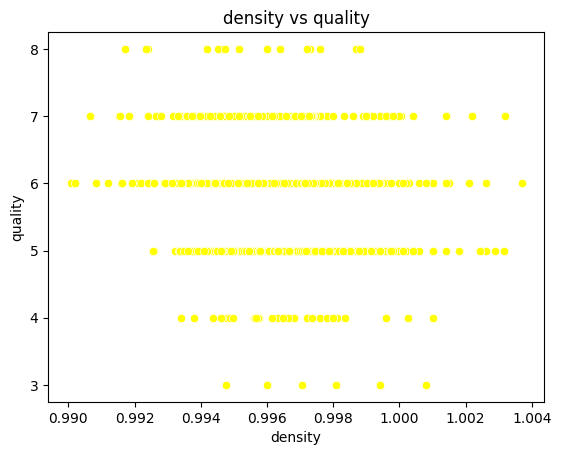

In [ ]:
#Scatterplot for density
columns=['pH', 'sulphates', 'alcohol', 'quality']
for column in columns:
  plt.title(f"density vs {column}")
  sns.scatterplot(data=data, x='density',y=column,
                  color='yellow')
  plt.show()

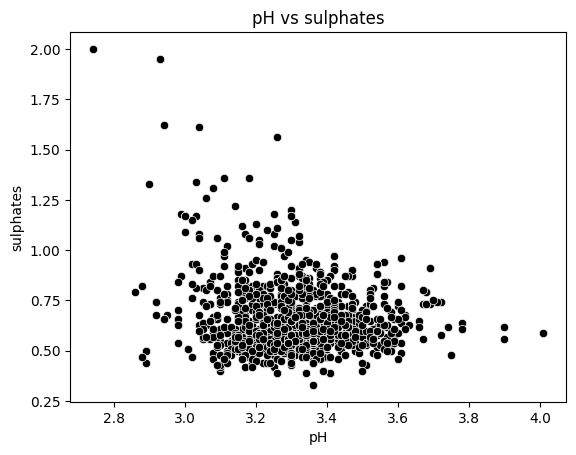

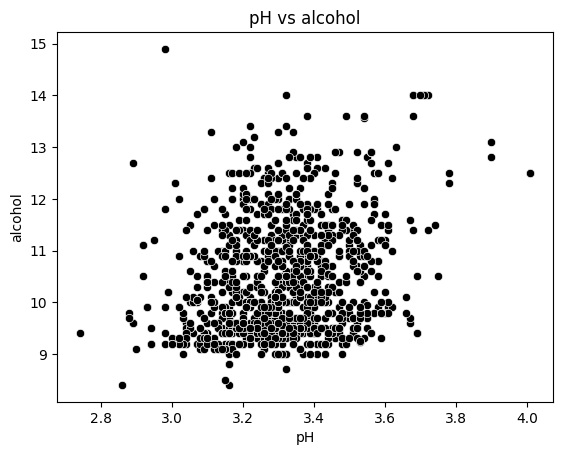

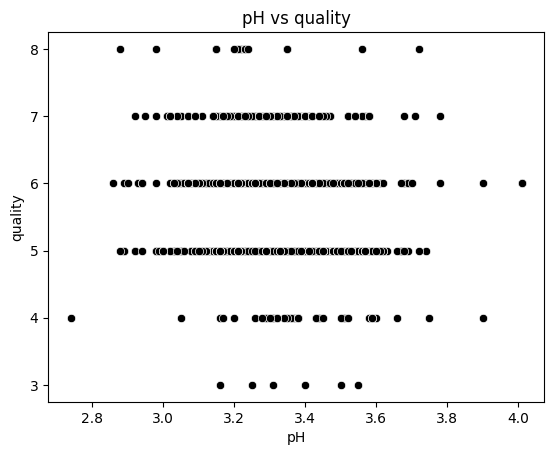

In [ ]:
#Scatterplot for pH
columns=['sulphates', 'alcohol', 'quality']
for column in columns:
  plt.title(f"pH vs {column}")
  sns.scatterplot(data=data, x='pH',y=column,
                  color='black')
  plt.show()

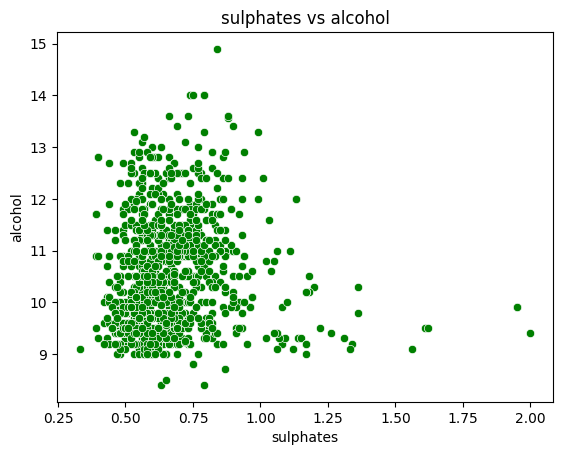

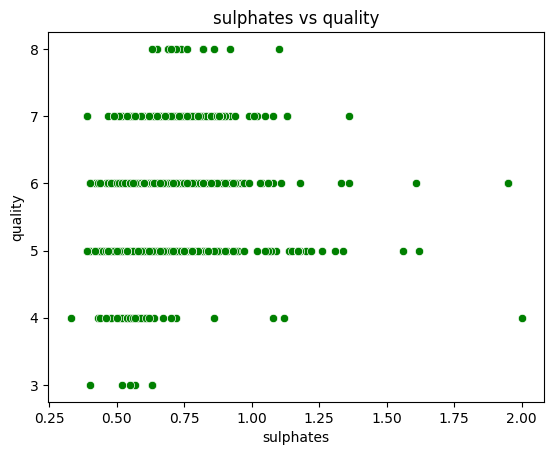

In [ ]:
#Scatterplot for sulphates
columns=['alcohol', 'quality']
for column in columns:
  plt.title(f"sulphates vs {column}")
  sns.scatterplot(data=data, x='sulphates',
                  y=column,color='g')
  plt.show()

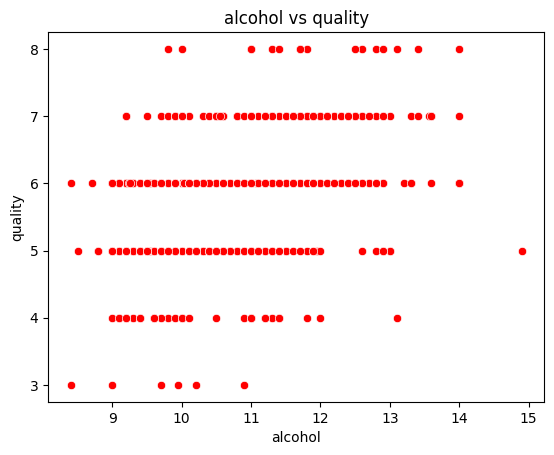

In [ ]:
#Scatterplot for alcohol
columns=['quality']
for column in columns:
  plt.title(f"alcohol vs {column}")
  sns.scatterplot(data=data, x='alcohol',y=column, color='red')
  plt.show()

In [ ]:
#Correlation
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

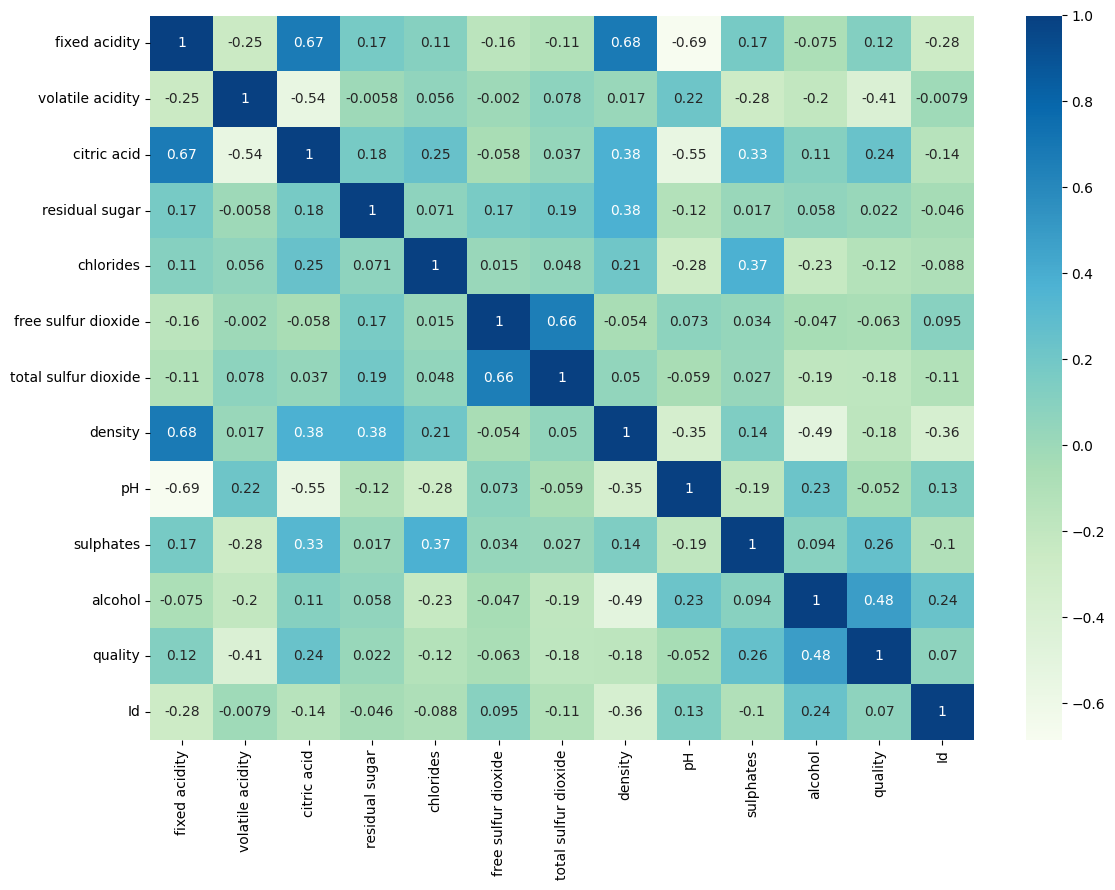

In [ ]:
#heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data=data.corr(),annot=True,cmap='GnBu')
plt.tight_layout()
plt.show()

#Checking Chemical Qualities

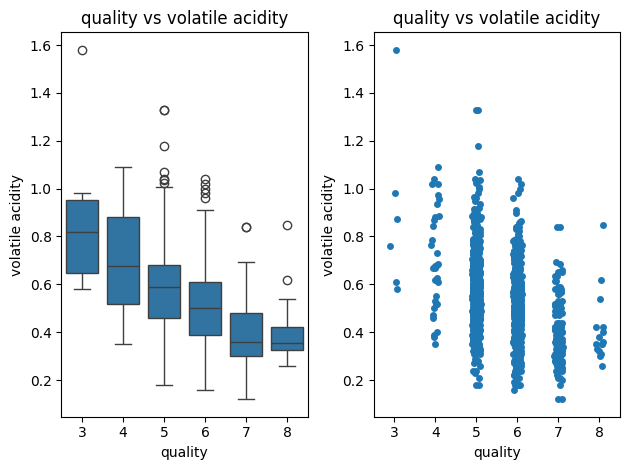

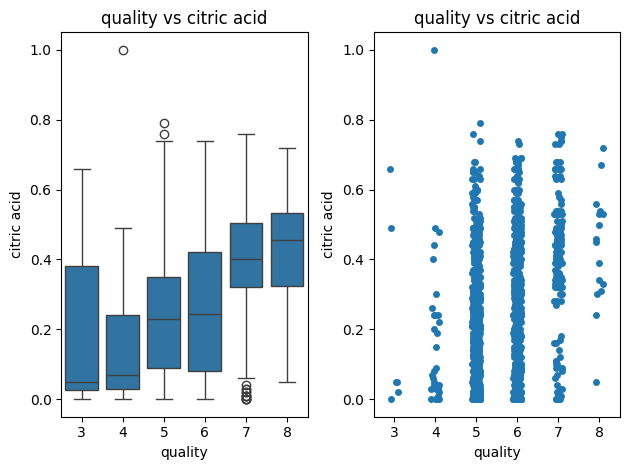

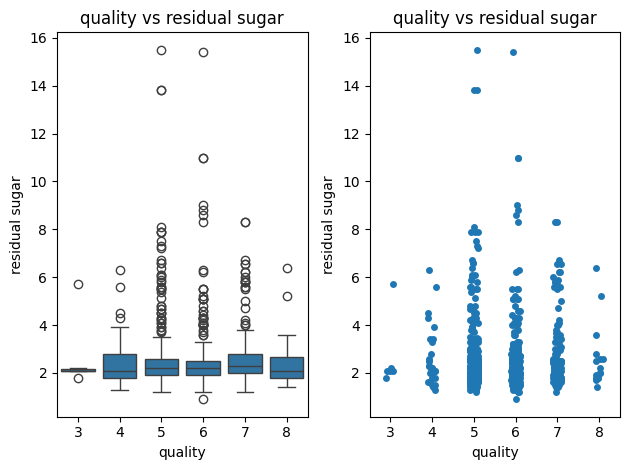

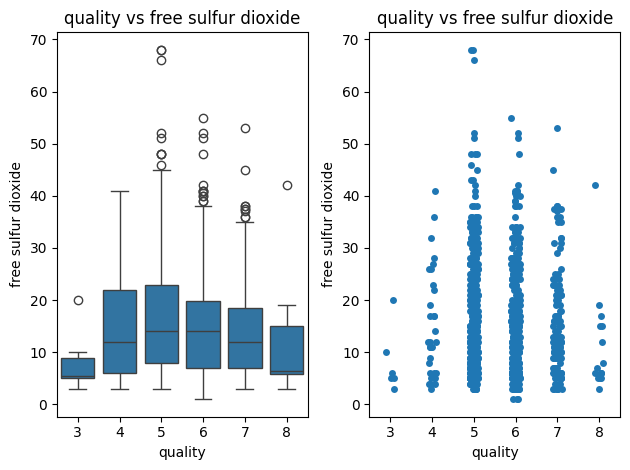

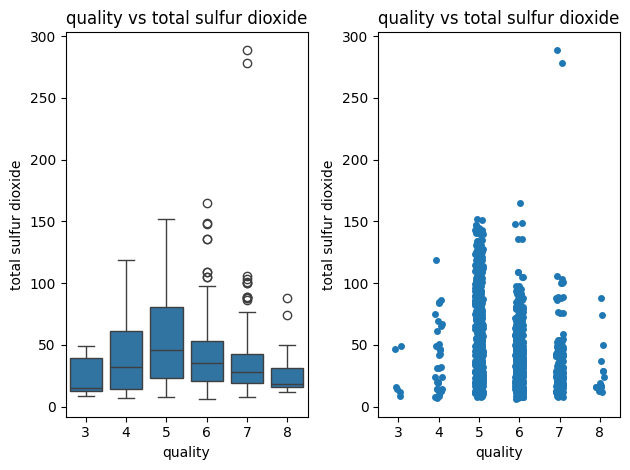

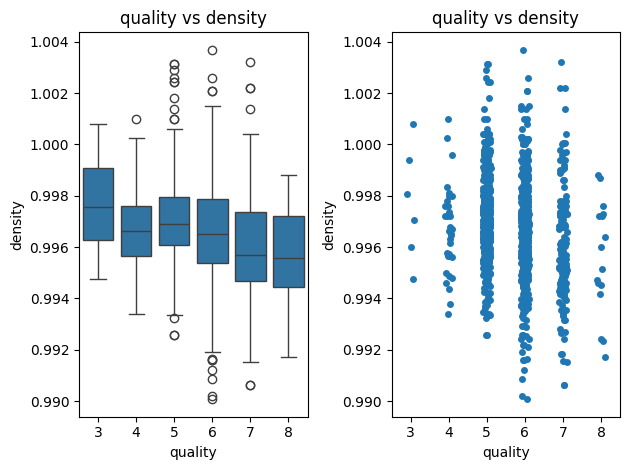

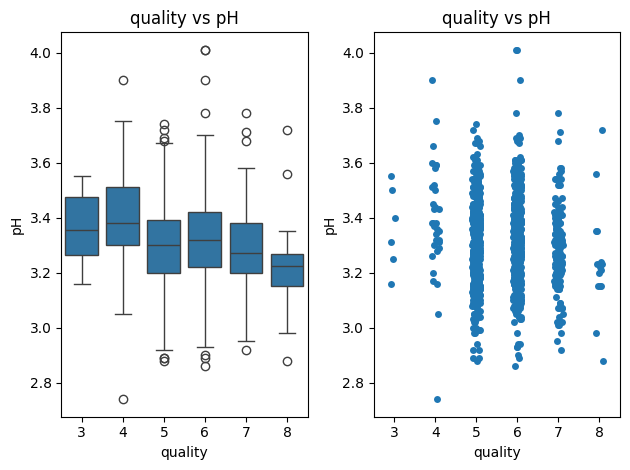

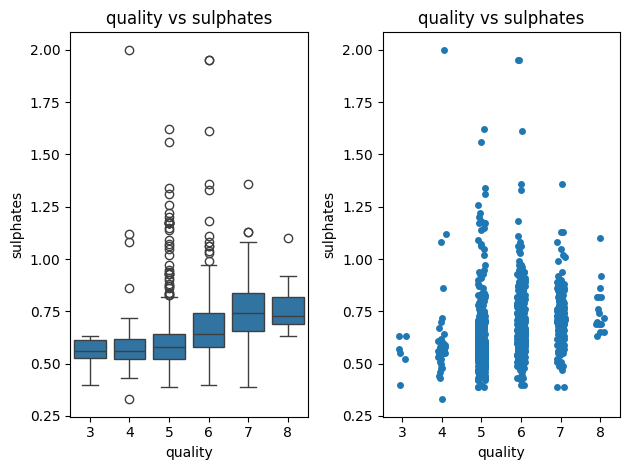

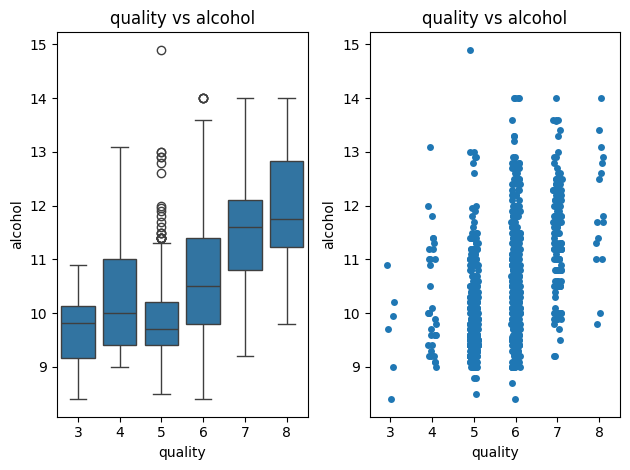

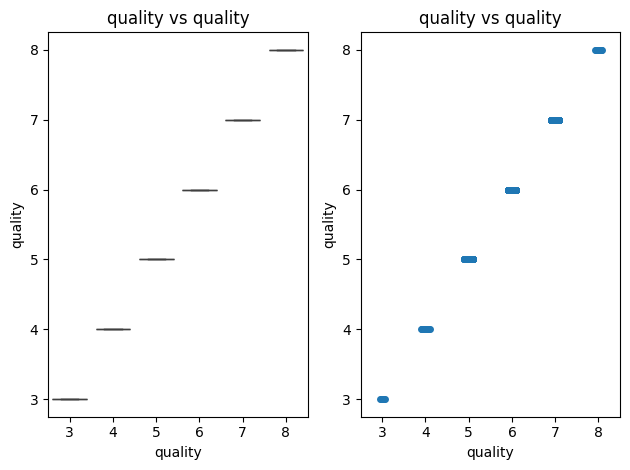

In [ ]:
#boxplot and strip plot
columns=['volatile acidity','citric acid','residual sugar',
         'free sulfur dioxide','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
  plt.subplot(1,2,1)
  plt.title(f"quality vs {column}")
  sns.boxplot(data=data,x='quality',y=column)

  plt.subplot(1,2,2)
  plt.title(f"quality vs {column}")
  sns.stripplot(data=data, x='quality',y=column)
  plt.tight_layout()
  plt.show()

#Data Preprocessing and Train-testing-split:

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
input_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'free sulfur dioxide','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
output_col ='quality'

In [5]:
numeric_cols = data[input_cols].select_dtypes(include=
                  np.number).columns.tolist()
print(numeric_cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [6]:
X = data[input_cols]
y = data[output_col]

In [7]:
#Train-test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=
                             0.2, random_state = 100)

In [8]:
#Shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 10)
(229, 10)
(914,)
(229,)


In [9]:
#Scaling the input numeric cols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[numeric_cols])
X_train[numeric_cols]=scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [10]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
1052       0.061947          0.239726         0.11        0.089041   
743        0.265487          0.205479         0.25        0.205479   
432        0.371681          0.082192         0.54        0.109589   
241        0.557522          0.184932         0.47        0.061644   
767        0.619469          0.198630         0.54        0.041096   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1052             0.223881              0.293286  0.128488  0.629921   
743              0.402985              0.296820  0.570485  0.322835   
432              0.358209              0.180212  0.604258  0.511811   
241              0.074627              0.028269  0.596916  0.440945   
767              0.313433              0.123675  0.534508  0.220472   

      sulphates   alcohol  
1052   0.329341  0.794872  
743    0.143713  0.107692  
432    0.125749  0.123077  
241    0.251497  0.215385  
767    0.257485  0.230769

In [11]:
X_train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     914.000000        914.000000   914.000000      914.000000   
mean        0.330929          0.281478     0.267549        0.110380   
std         0.156094          0.124591     0.196952        0.093415   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.250000        0.089041   
75%         0.413717          0.356164     0.420000        0.116438   
max         0.973451          1.000000     1.000000        1.000000   

       free sulfur dioxide  total sulfur dioxide     density          pH  \
count           914.000000            914.000000  914.000000  914.000000   
mean              0.216908              0.137788    0.488130    0.448311   
std               0.153611              0.114904    0.142611    0.125154   
min               0.000000              0.000000    0.000000    0.000000   
25%               0.089552              0.053004    0.398678    0.362205   
50%               0.179104              0.107774    0.484949    0.444882   
75%               0.298507              0.190813    0.568649    0.519685   
max               1.000000              1.000000    1.000000    1.000000   

        sulphates     alcohol  
count  914.000000  914.000000  
mean     0.197140    0.317604  
std      0.103810    0.168688  
min      0.000000    0.000000  
25%      0.131737    0.169231  
50%      0.173653    0.276923  
75%      0.239521    0.430769  
max      1.000000    0.861538

#Model Training

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [20]:
x=data.drop("quality",axis=1)

In [21]:
y=data['quality'].apply(lambda y_values:1 if y_values>=7 else 0)

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [23]:
y.unique()

array([0, 1])

In [24]:
rfc = RandomForestClassifier()

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
acc = accuracy_score(y_test,y_pred)

In [32]:
print(acc)

0.6855895196506551


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=
                             0.25, random_state = 100)

In [37]:
models = {'Logistic Regression':LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'tree':DecisionTreeClassifier(),
          'SVR': SVC(),'Random forest':RandomForestClassifier()}

In [40]:
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy

print(accuracy_results)

{'Logistic Regression': 0.8881118881118881, 'KNN': 0.8776223776223776, 'tree': 0.8776223776223776, 'SVR': 0.8881118881118881, 'Random forest': 0.9125874125874126}


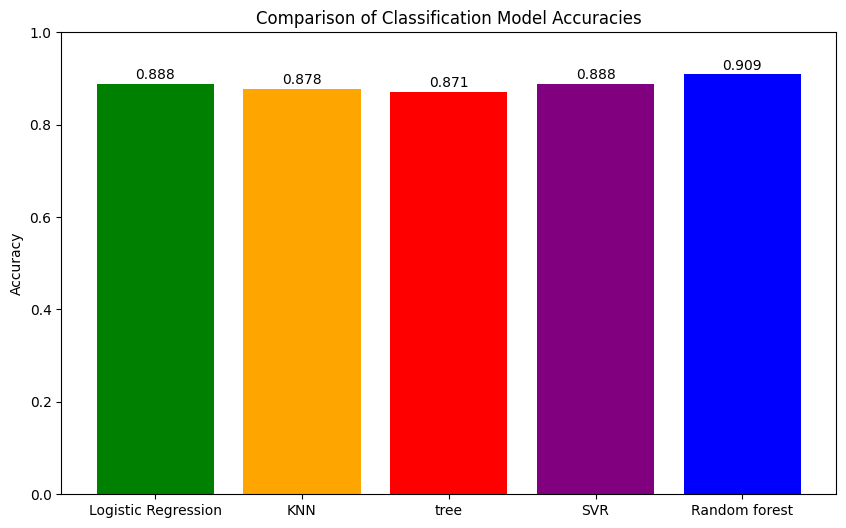

In [39]:
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())
plt.figure(figsize=(10,6))
plt.bar(model_names, accuracy_values, color=['green','orange','red',
                                             'purple','blue'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0,1)
for i, v in enumerate(accuracy_values):
  plt.text(i, v+0.01,"{:.3f}".format(v),ha='center',color='black')

plt.show()
